In [2]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist, squareform

%matplotlib inline

In [3]:
pd_data =pd.read_csv(os.getcwd() + '/processed_data.csv')

In [4]:
pd_data = pd_data.drop(columns=['release_date', 'steam_appid','platforms', 'categories','min_RAM','positive_ratings','negative_ratings','steamspy_tags', 'english', 'pc_requirements', 'mac_requirements','achievements','linux_requirements', 'minimum', 'recommended'])
pd_data.columns
pd_data = pd_data.dropna()

## Setting the threshold 

In [5]:
thresh = 500
pd_data.columns.unique()

Index(['Unnamed: 0', 'name', 'developer', 'publisher', 'required_age',
       'genres', 'average_playtime', 'median_playtime', 'owners', 'price',
       'grade', 'month', 'year', 'num_sytems', 'num_systems'],
      dtype='object')

In [6]:
pd_data["price"].unique()

array([7.1900e+00, 3.9900e+00, 0.0000e+00, 5.7900e+00, 5.9900e+00,
       1.4990e+01, 2.2990e+01, 6.9900e+00, 4.9900e+00, 1.0990e+01,
       2.9900e+00, 4.2900e+00, 1.2990e+01, 2.4900e+00, 9.9900e+00,
       1.9900e+00, 1.5990e+01, 3.4900e+00, 2.4990e+01, 8.5900e+00,
       7.9900e+00, 4.4900e+00, 4.2500e+00, 5.5900e+00, 2.5990e+01,
       8.9900e+00, 4.7900e+00, 1.3990e+01, 8.2900e+00, 9.2900e+00,
       1.9990e+01, 1.7900e+00, 1.6990e+01, 8.6900e+00, 7.4900e+00,
       7.9000e-01, 1.6900e+00, 1.5490e+01, 1.4900e+00, 1.7990e+01,
       1.1990e+01, 3.5960e+01, 6.4900e+00, 1.5900e+00, 3.4990e+01,
       9.9000e-01, 5.1900e+00, 2.0900e+00, 2.9990e+01, 1.9980e+01,
       2.7900e+00, 2.8900e+00, 3.4950e+01, 1.2490e+01, 1.1390e+01,
       4.3900e+00, 1.8990e+01, 9.5990e+01, 1.0590e+01, 6.1900e+00,
       3.9990e+01, 2.6990e+01, 3.0990e+01, 6.0000e+00, 2.3990e+01,
       5.2990e+01, 3.3990e+01, 1.2390e+01, 8.4900e+00, 2.3790e+01,
       1.9490e+01, 3.8990e+01, 2.3390e+01, 6.9500e+00, 1.1490e

In [21]:
nodes = pd_data[['developer', 'publisher', 'name', 'genres', 'owners', 'year', 'month', 'num_systems']][:thresh]
edges = pd_data[['average_playtime', 'median_playtime', 'price', 'grade',  ]][:thresh]

In [22]:
n_nodes = len(nodes)
adjacency = np.zeros((n_nodes, n_nodes), dtype=int)

In [23]:
n_nodes

500

In [24]:
def epsilon_similarity_graph(X: np.ndarray, sigma=1, epsilon=0):
    """ X (n x d): coordinates of the n data points in R^d.
        sigma (float): width of the kernel
        epsilon (float): threshold
        Return:
        adjacency (n x n ndarray): adjacency matrix of the graph.
    """
    sq_dist = pdist(X)
    pairwise_dists = squareform(sq_dist)**2
    adjacency = np.exp( -pairwise_dists / (2*sigma**2) - np.identity(len(pairwise_dists)))

    threshold = adjacency < epsilon

    adjacency[threshold]=0
    
    return adjacency

The value of sigma is 0.0


(array([ 10062.,   1364.,   1472.,    722.,   1698.,   1712.,   2956.,
          3178.,  14458., 212378.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

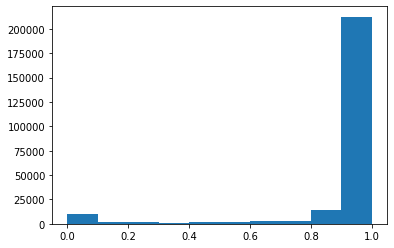

In [25]:
sq_dist = pdist(edges)
sigma = np.std(sq_dist)
print(f'The value of sigma is {np.std(sigma)}')
pairwise_dists = squareform(sq_dist)**2
adjacency = np.exp( -pairwise_dists / sigma**2 / 2) - np.identity(len(pairwise_dists))
plt.hist(adjacency.flatten())

In [30]:
epsilon = 0.9

In [31]:
adjacency = epsilon_similarity_graph(edges,sigma,epsilon) 

(array([ 37622.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 212378.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

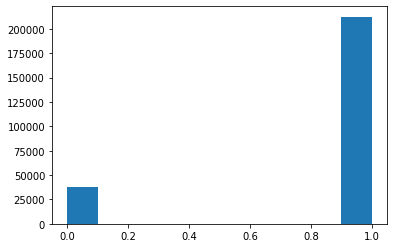

In [32]:
adjacency
plt.hist(adjacency.flatten())

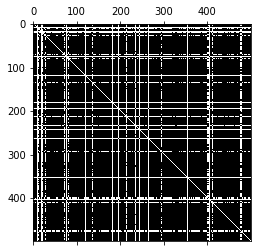

In [33]:
plt.spy(adjacency)
plt.show()

In [182]:
def compute_laplacian(adjacency: np.ndarray, normalize: bool):
    """ Return:
        L (n x n ndarray): combinatorial or symmetric normalized Laplacian.
    """
    distance = np.array([np.sum(adjacency,0)])
    laplacian = np.diag(distance[0]) - adjacency
    
    if (normalize):
        for i in range(0,np.shape(laplacien)[0]):
            for j in range(0,np.shape(laplacien)[1]):
                laplacian[i,j] = laplacien[i,j]/np.sqrt(dist[i]*dist[j])
    return laplacien

In [183]:
dist=np.array([np.sum(adjacency,0)])
np.diag(dist[0])-adjacency

array([[ 4.62613354e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  4.77328567e+02, -9.99421932e-01, ...,
        -9.98485818e-01, -9.93158550e-01, -2.43946469e-01],
       [ 0.00000000e+00, -9.99421932e-01,  4.77120756e+02, ...,
        -9.98694118e-01, -9.91311748e-01, -2.32960669e-01],
       ...,
       [ 0.00000000e+00, -9.98485818e-01, -9.98694118e-01, ...,
         4.77906924e+02, -9.96285774e-01, -2.48419976e-01],
       [ 0.00000000e+00, -9.93158550e-01, -9.91311748e-01, ...,
        -9.96285774e-01,  4.76771038e+02, -2.85040717e-01],
       [ 0.00000000e+00, -2.43946469e-01, -2.32960669e-01, ...,
        -2.48419976e-01, -2.85040717e-01,  1.31150557e+02]])

In [184]:
#adjacency = adjacency[adjacency > 0]

In [185]:
#adjacency[[True,True],[True, False]]

## Graph building and visualization 

In [186]:
import networkx as nx

In [187]:
graph = nx.from_numpy_array(adjacency)

In [188]:
node_props = nodes.to_dict()

In [189]:
for key in node_props:
    # print(key, node_props[key])
    nx.set_node_attributes(graph, node_props[key], key)

In [190]:
graph.node[1]

{'developer': 'Valve',
 'publisher': 'Valve',
 'name': 'Team Fortress Classic',
 'genres': 'Action',
 'owners': '5000000-10000000'}

/Users/peterbonnesoeur/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


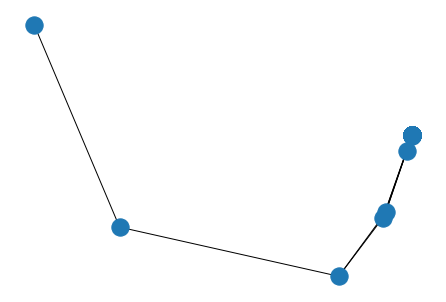

In [191]:
nx.draw_spectral(graph)

In [192]:
nx.write_gexf(graph, "test"+str(thresh)+".gexf")

## Test sparse Matrices 

In [1]:
import numpy as np
from scipy.sparse import csr_matrix

In [ ]:
def epsilon_similarity_graph(X: np.ndarray, sigma=1, epsilon=0):
    """ X (n x d): coordinates of the n data points in R^d.
        sigma (float): width of the kernel
        epsilon (float): threshold
        Return:
        adjacency (n x n ndarray): adjacency matrix of the graph.
    """
    sq_dist = pdist(X)
    pairwise_dists = squareform(sq_dist)**2
    adjacency = np.exp( -pairwise_dists / (2*sigma**2) - np.identity(len(pairwise_dists)))

    threshold = adjacency < epsilon

    adjacency[threshold]=0
    
    return adjacency

In [ ]:
G=nx.from_pandas_edgelist(df_tmp,'Src_IATA','Des_IATA', edge_attr='weight')

In [ ]:
pd_data["price"].unique()